In [1]:
import pandas as pd
import plotly.express as px
from tqdm import tqdm

In [ ]:
import numpy as np


In [2]:
df = pd.read_csv('rio-2016-athletes.csv')
df

name      sport nationality     sex date_of_birth  \
0           A Jesus Garcia  athletics         ESP    male      10/17/69   
1               A Lam Shin    fencing         KOR  female       9/23/86   
2              Aaron Brown  athletics         CAN    male       5/27/92   
3               Aaron Cook  taekwondo         MDA    male        1/2/91   
4               Aaron Gate    cycling         NZL    male      11/26/90   
...                    ...        ...         ...     ...           ...   
11533    Zsuzsanna Jakabos   aquatics         HUN  female        4/3/89   
11534  Zurabi Datunashvili  wrestling         GEO    male       6/18/91   
11535  Zurabi Iakobishvili  wrestling         GEO    male        2/4/92   
11536   Zurian Hechavarria  athletics         CUB  female       8/10/95   
11537       Zuzana Hejnova  athletics         CZE  female      12/19/86   

       age (at start of games)  height (m)  weight (kg)   BMI  gold  silver  \
0                         46.8        1.72         64.0  21.6     0       0   
1                         29.9        1.68         56.0  19.8     0       0   
2                         24.2        1.98         79.0  20.2     0       0   
3                         25.6        1.83         80.0  23.9     0       0   
4                         25.7        1.81         71.0  21.7     0       0   
...                        ...         ...          ...   ...   ...     ...   
11533                     27.4        1.85         70.0  20.5     0       0   
11534                     25.2        1.83         75.0  22.4     0       0   
11535                     24.5        1.71         68.0  23.3     0       0   
11536                     21.0        1.64         58.0  21.6     0       0   
11537                     29.6        1.73         63.0  21.0     0       0   

       bronze  Unnamed: 12  
0           0          NaN  
1           0          NaN  
2           1          NaN  
3           0          NaN  
4           0          NaN  
...       ...          ...  
11533       0          NaN  
11534       0          NaN  
11535       0          NaN  
11536       0          NaN  
11537       0          NaN  

[11538 rows x 13 columns]

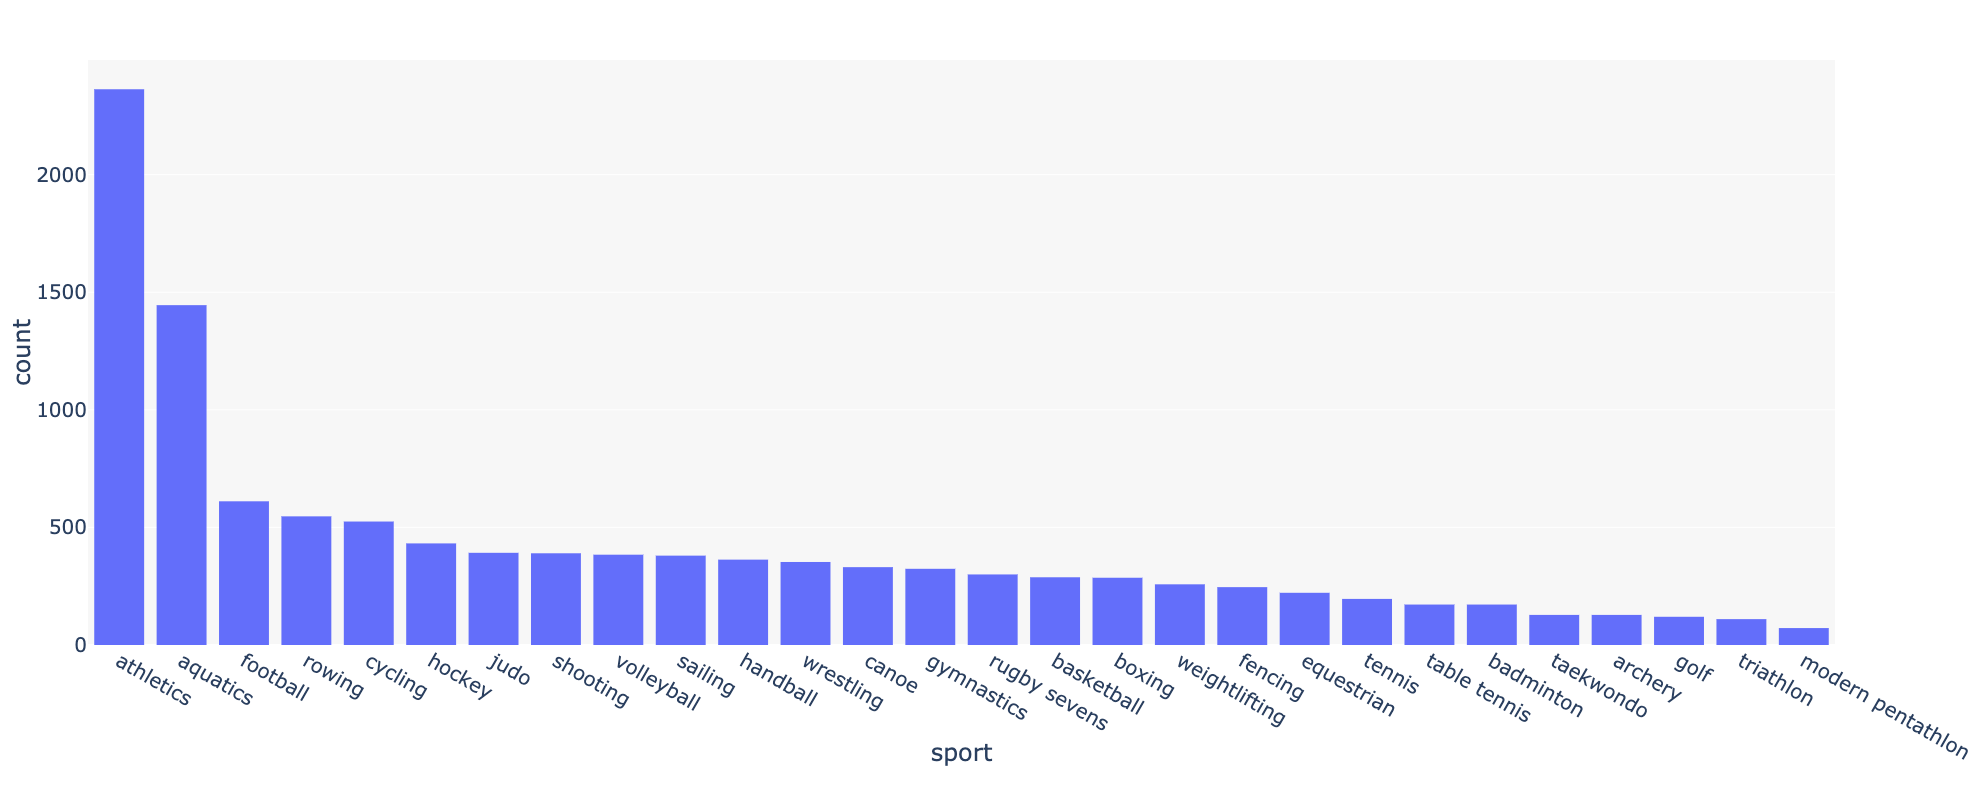

In [39]:
px.histogram(df.sort_values('sport'),x='sport').update_xaxes(categoryorder='total descending')\
.update_layout(height=800,width=1000,font_size=20,plot_bgcolor='#f7f7f7')

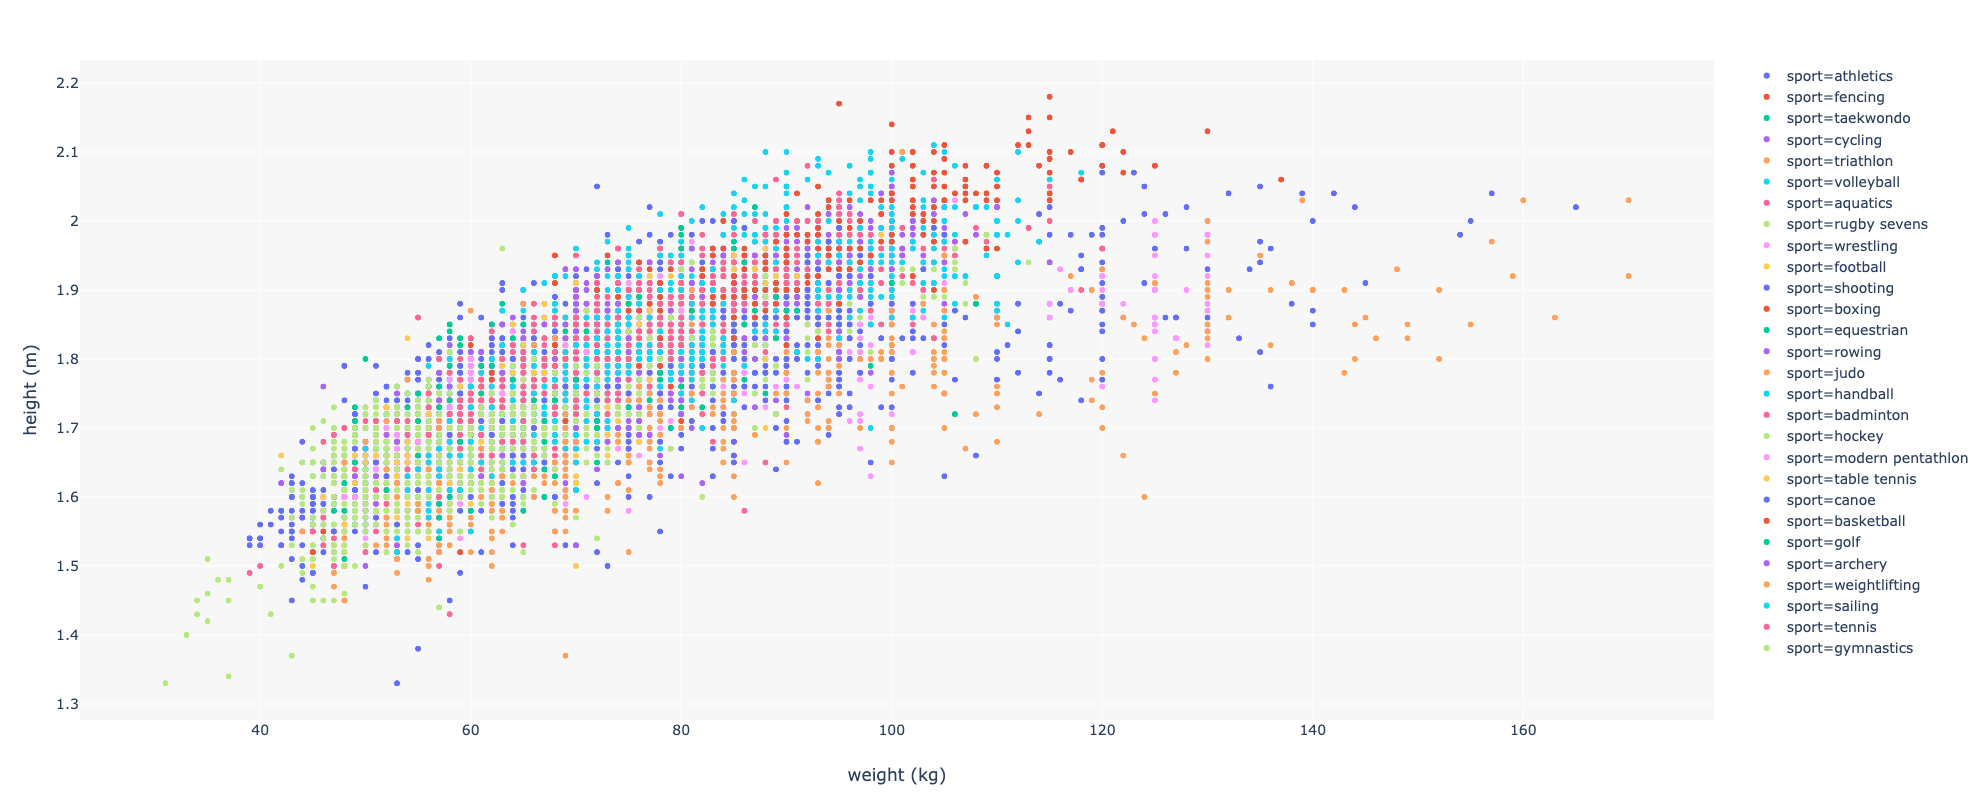

In [38]:
import plotly.express as px
px.scatter(df,y='height (m)',x='weight (kg)',color='sport',height=800,width=1000)\
.update_layout(height=800,width=1000,font_size=14,plot_bgcolor='#f7f7f7')

# Unsupervised Learning

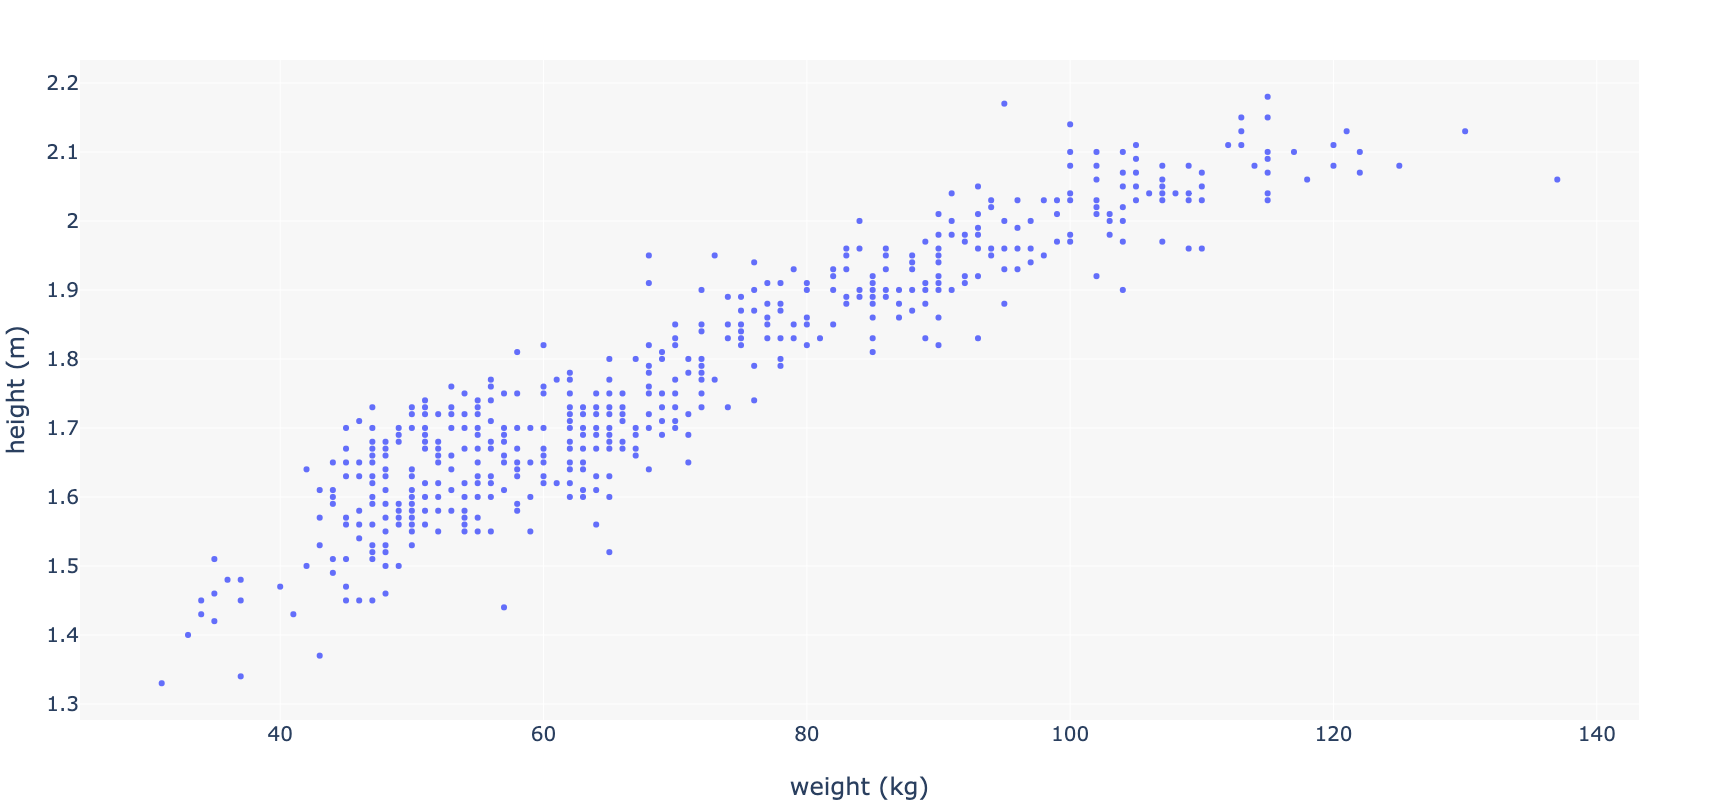

In [177]:
import plotly.express as px
df_plot = df[ df['sport'].isin({'basketball','gymnastics'}) ] #,'weightlifting'}) ]
df_plot = df_plot.groupby(['height (m)','weight (kg)'])['sport'].first().reset_index()
fig = px.scatter(df_plot,y='height (m)',x='weight (kg)')\
.update_layout(height=800,width=800,font_size=20,plot_bgcolor='#f7f7f7')

fig.write_image("/Users/tim/Desktop/fig.png")
fig.show()

# Gymastics vs Basketball

gymnastics    240
basketball    223
Name: sport, dtype: int64


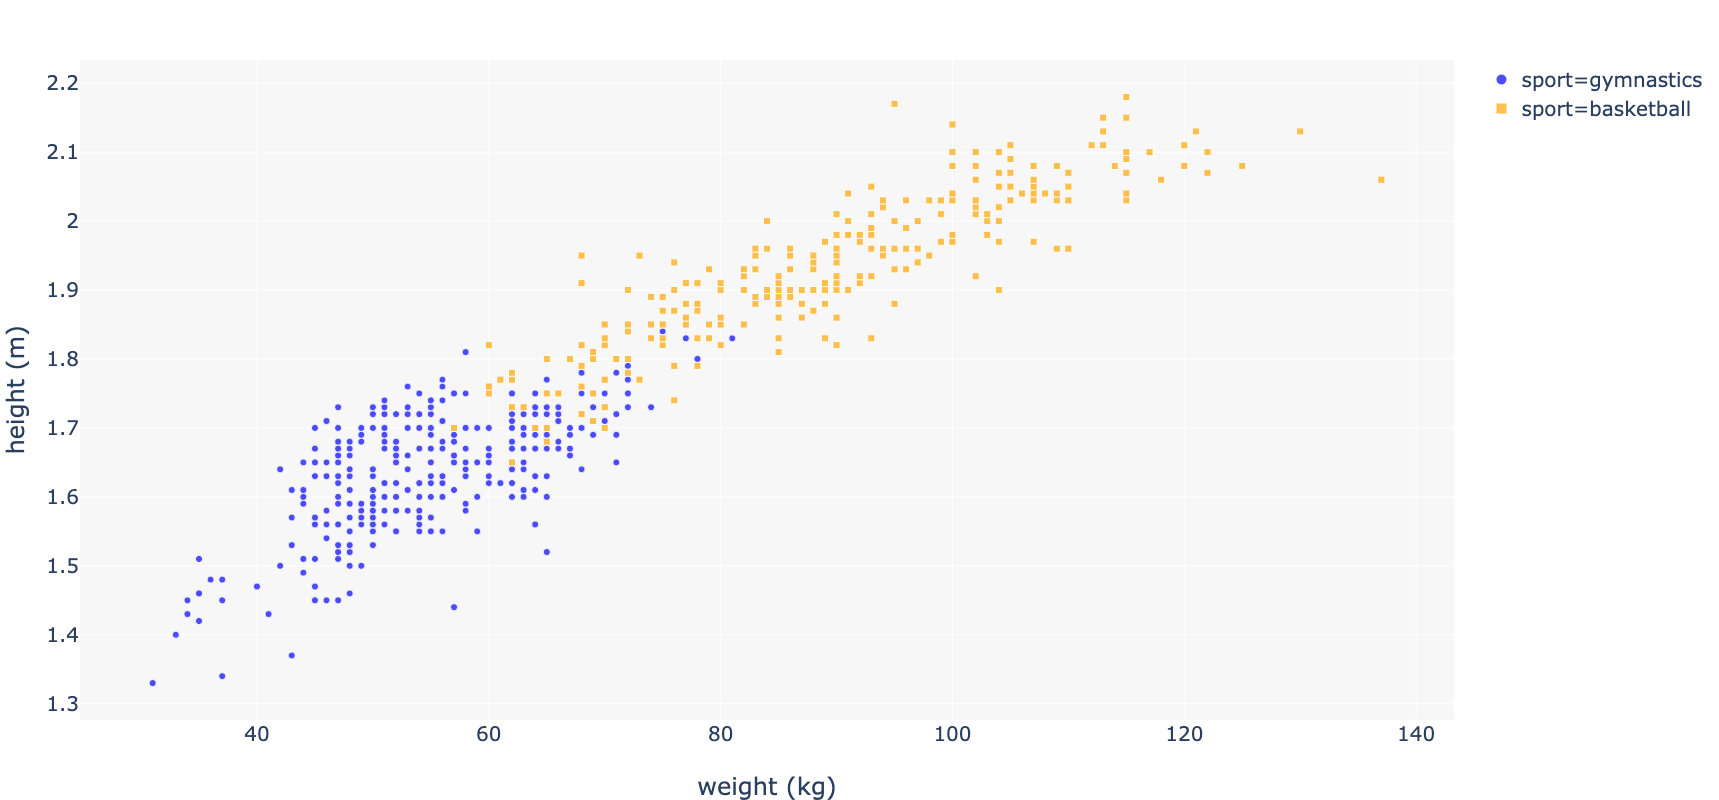

In [217]:
df_plot = df[ df['sport'].isin({'basketball','gymnastics'}) ] #,'weightlifting'}) ]
df_plot = df_plot.groupby(['height (m)','weight (kg)'])['sport'].first().reset_index()
df_plot['size'] = 5

print(df_plot['sport'].value_counts())

fig = px.scatter(df_plot,y='height (m)',x='weight (kg)',color='sport',size='size',size_max=5,symbol='sport',
           symbol_map={'gymnastics':'circle','basketball':'square'},
           color_discrete_map={'gymnastics':'blue','basketball':'orange'})\
.update_layout(height=800,width=1000,font_size=20,plot_bgcolor='#f7f7f7')

fig.write_image("/Users/tim/Desktop/fig.png")
fig.show()

In [180]:
X = df_plot[['height (m)','weight (kg)']].values
Y = df_plot['sport'].values

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.7)

## Different Depth

In [212]:
depth = 10

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
mod = DecisionTreeClassifier(max_depth=depth,criterion='gini')
mod.fit(X,Y)
Y_pred = mod.predict(X)

from sklearn.metrics import classification_report
print(classification_report(Y_pred,Y,digits=4))

              precision    recall  f1-score   support

  basketball     0.9955    0.9569    0.9758       232
  gymnastics     0.9583    0.9957    0.9766       231

    accuracy                         0.9762       463
   macro avg     0.9769    0.9763    0.9762       463
weighted avg     0.9770    0.9762    0.9762       463



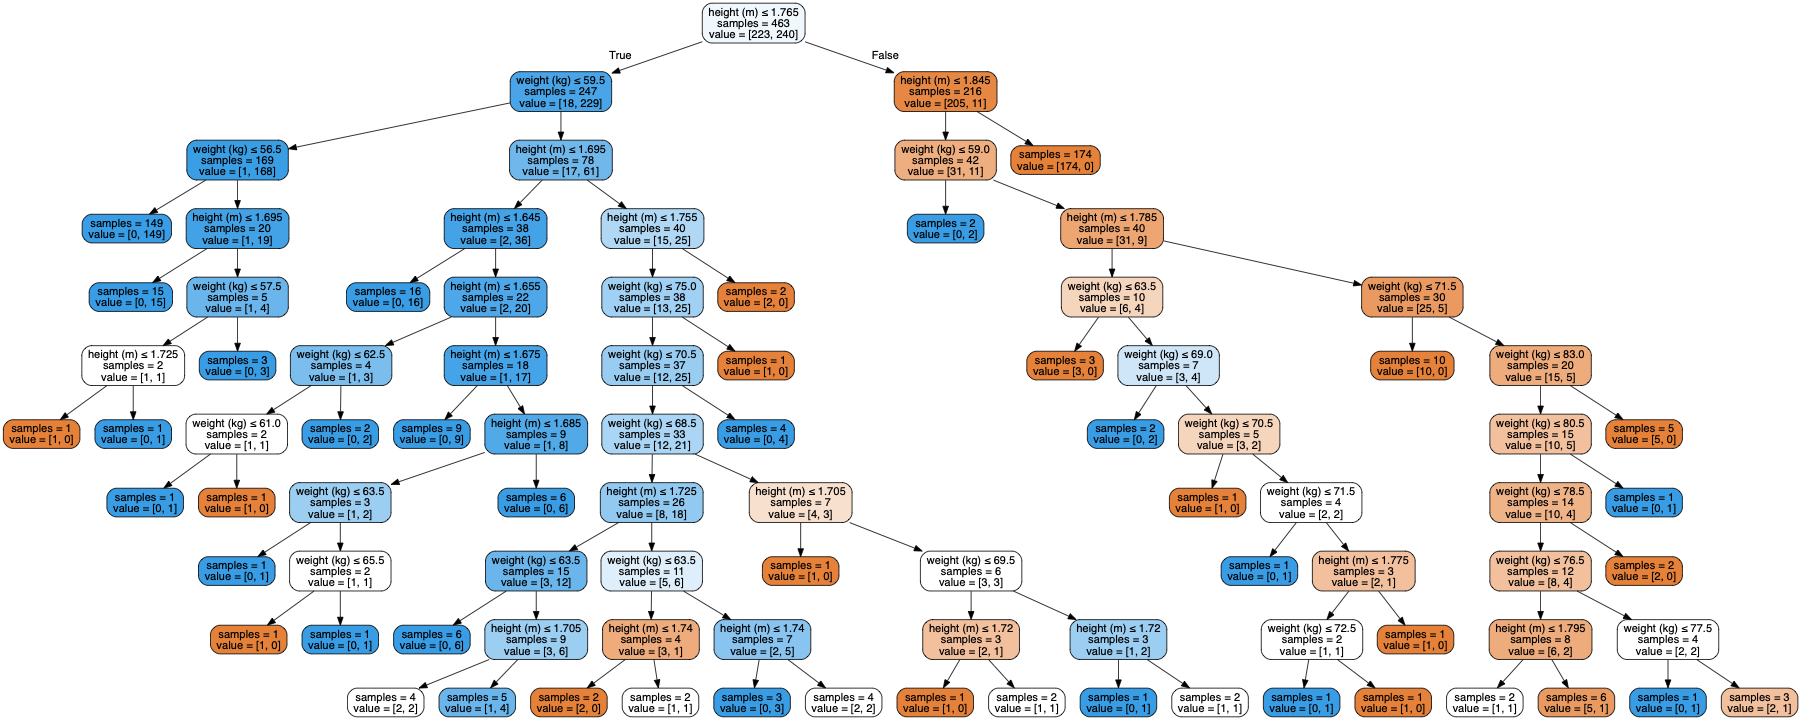

In [213]:
feature_cols = ['height (m)','weight (kg)']

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

dtree = mod
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,impurity=False,proportion=False,
                special_characters=True,feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.set_size('"1000,10"')
graph.write_png('tmp.png')
Image(graph.create_png())

basketball    232
gymnastics    231
Name: sport_pred, dtype: int64


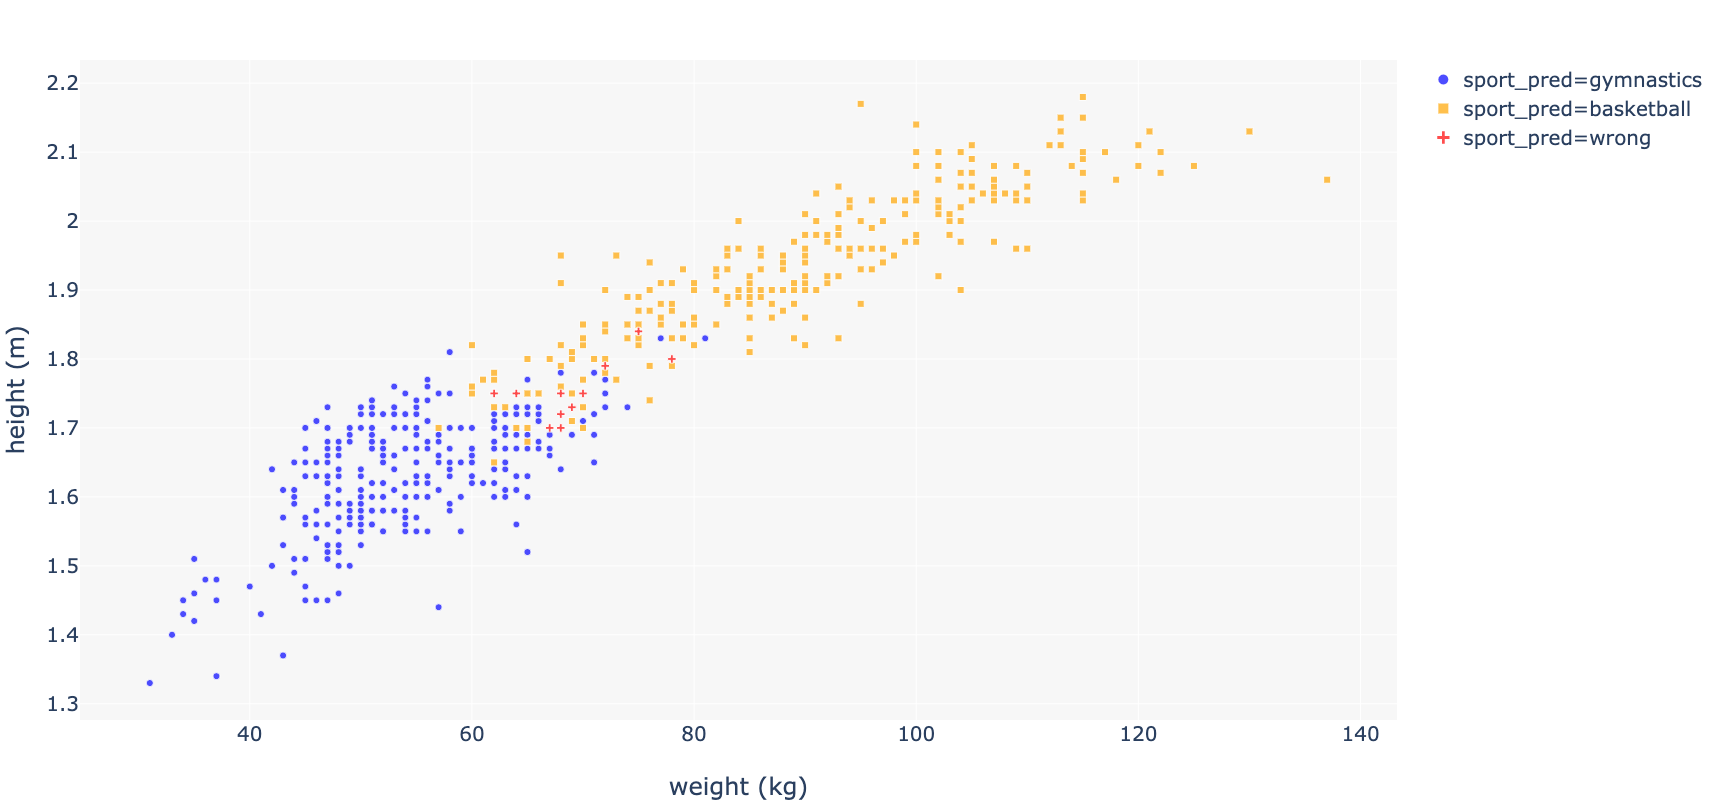

In [214]:
df_plot = df[ df['sport'].isin({'basketball','gymnastics'}) ] #,'weightlifting'}) ]
df_plot = df_plot.groupby(['height (m)','weight (kg)'])['sport'].first().reset_index()
df_plot['size'] = 5

df_plot['sport_pred'] = mod.predict(df_plot[['height (m)','weight (kg)']].values)
print(df_plot['sport_pred'].value_counts())
df_plot.loc[ df_plot['sport_pred'] != df_plot['sport'], 'sport_pred'] = 'wrong'

fig = px.scatter(df_plot,y='height (m)',x='weight (kg)',color='sport_pred',size='size',size_max=5,symbol='sport_pred',
           symbol_map={'gymnastics':'circle','basketball':'square','wrong':'cross'},
           color_discrete_map={'gymnastics':'blue','basketball':'orange','wrong':'red'})\
.update_layout(height=800,width=1000,font_size=20,plot_bgcolor='#f7f7f7')

fig.write_image("/Users/tim/Desktop/fig.png")
fig.show()

## train vs test

basketball    117
gymnastics    114
Name: sport, dtype: int64


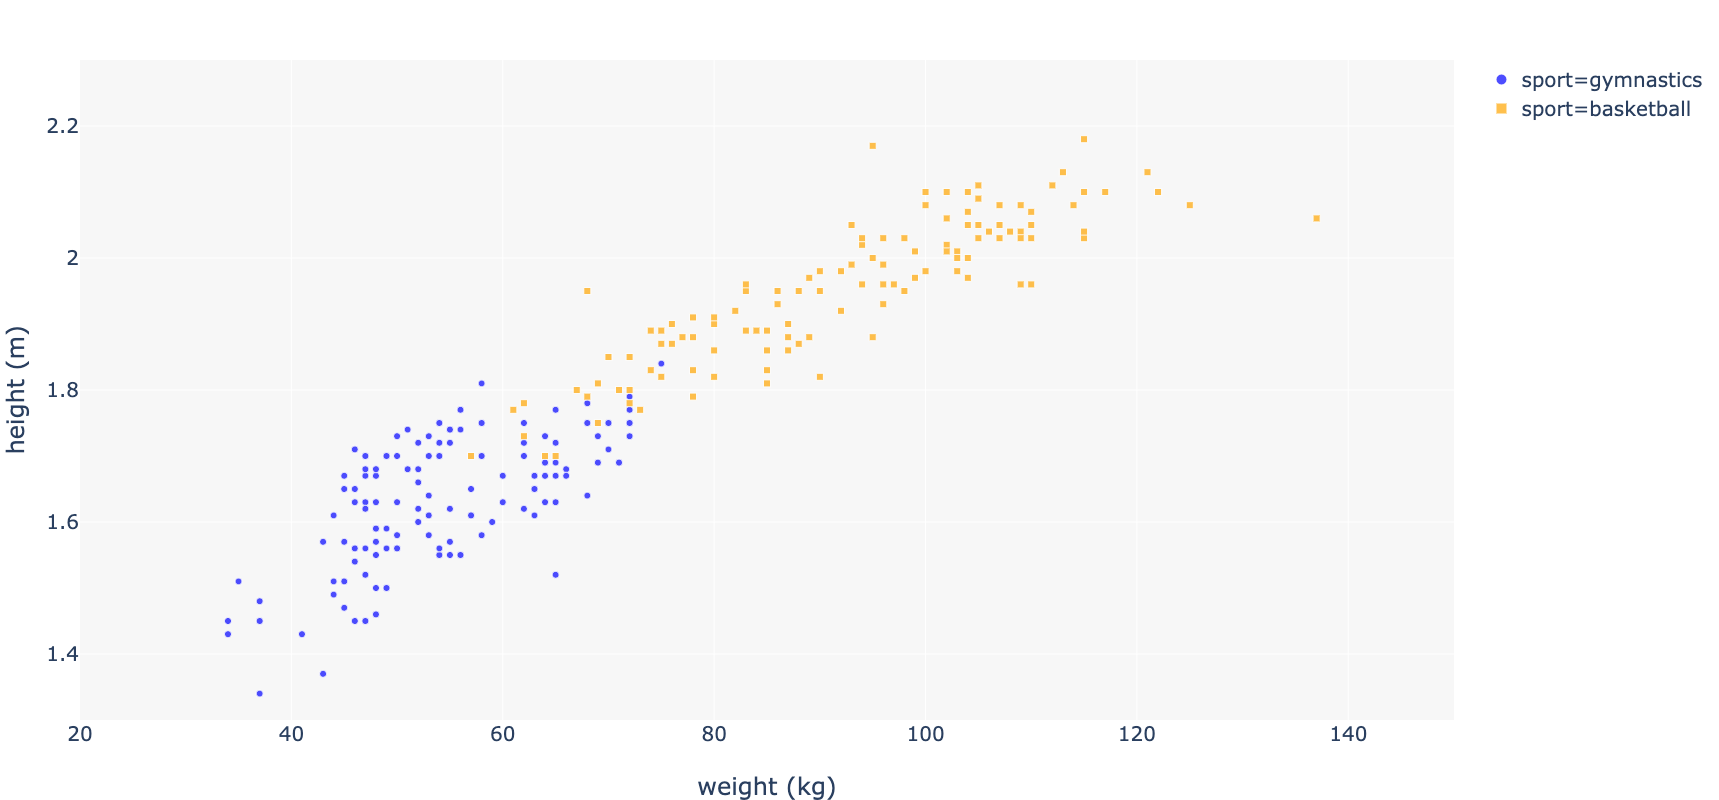

In [215]:
df_plot = df[ df['sport'].isin({'basketball','gymnastics'}) ] #,'weightlifting'}) ]
df_plot = df_plot.groupby(['height (m)','weight (kg)'])['sport'].first().reset_index()
df_plot['size'] = 5

import random
ixs = set(df_plot.index)
ixs_train = random.sample(ixs,k=len(ixs)//2)
ixs_test = set(ixs)-set(ixs_train)

df_plot_train = df_plot.loc[ixs_train]
df_plot_test = df_plot.loc[ixs_test]

print(df_plot_train['sport'].value_counts())
fig = px.scatter(df_plot_train,y='height (m)',x='weight (kg)',color='sport',size='size',size_max=5,symbol='sport',
           symbol_map={'gymnastics':'circle','basketball':'square'},
           color_discrete_map={'gymnastics':'blue','basketball':'orange'},
                range_x=(20,150),
range_y=(1.3,2.3))\
.update_layout(height=800,width=1000,font_size=20,plot_bgcolor='#f7f7f7')

fig.write_image("/Users/tim/Desktop/fig.png")
fig.show()


gymnastics    126
basketball    106
Name: sport, dtype: int64


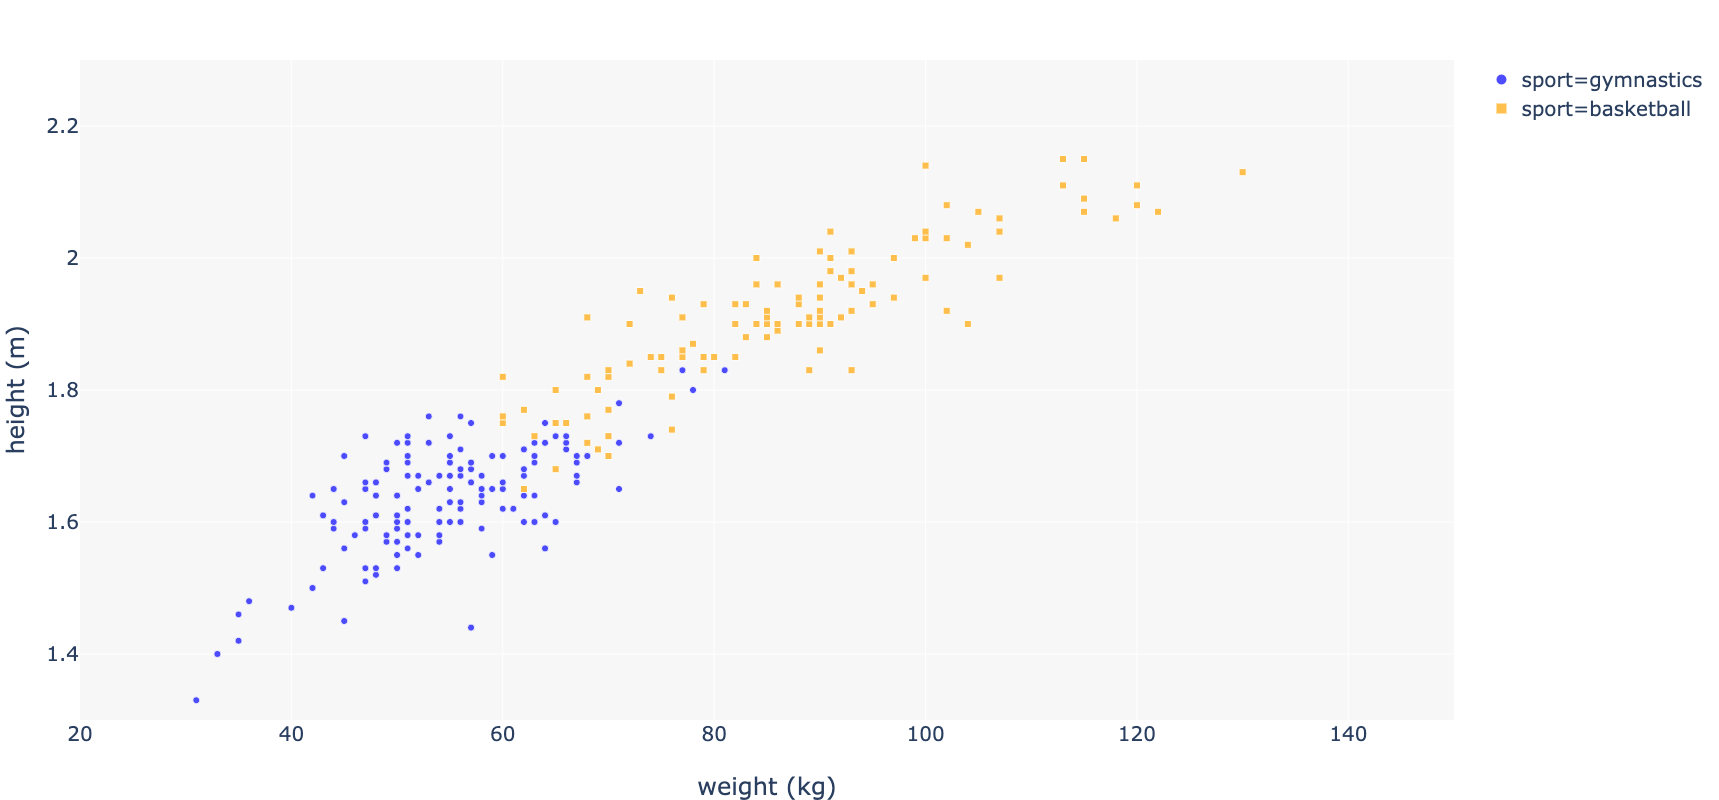

In [216]:
print(df_plot_test['sport'].value_counts())
fig = px.scatter(df_plot_test,y='height (m)',x='weight (kg)',color='sport',size='size',size_max=5,symbol='sport',
           symbol_map={'gymnastics':'circle','basketball':'square'},
           color_discrete_map={'gymnastics':'blue','basketball':'orange'},
range_x=(20,150),
range_y=(1.3,2.3))\
.update_layout(height=800,width=1000,font_size=20,plot_bgcolor='#f7f7f7')

fig.write_image("/Users/tim/Desktop/fig.png")
fig.show()

In [161]:
heights = sorted(set(df_plot['height (m)']))
Y_ = ( Y == 'gymnastics' )
wrong_pay = 1000
human_pay = 500
best_pay = 100000000000
for height in tqdm(heights):
    for height_ in heights:
        if height_ <= height:
            continue     
        Y_pred = ( X[:,0] <= height  )*0.5 + ( X[:,0] <= height_ )*0.5
        pay = ( ( Y_pred == 0.5 )*human_pay ).sum() + ( ( np.abs( Y_pred - Y_ ) > 0.5 )*wrong_pay ).sum()
        if pay > best_pay:
            continue
        best_pay = pay
        best_select = (height,height_)
        best_n_human = np.sum( Y_pred == 0.5 )
print(best_pay,best_select,best_n_human)

100%|██████████| 79/79 [00:00<00:00, 847.79it/s]

149500 (1.73, 1.75) 21


# Modern Pentathlon vs Athletics

athletics            977
modern pentathlon     26
Name: sport, dtype: int64


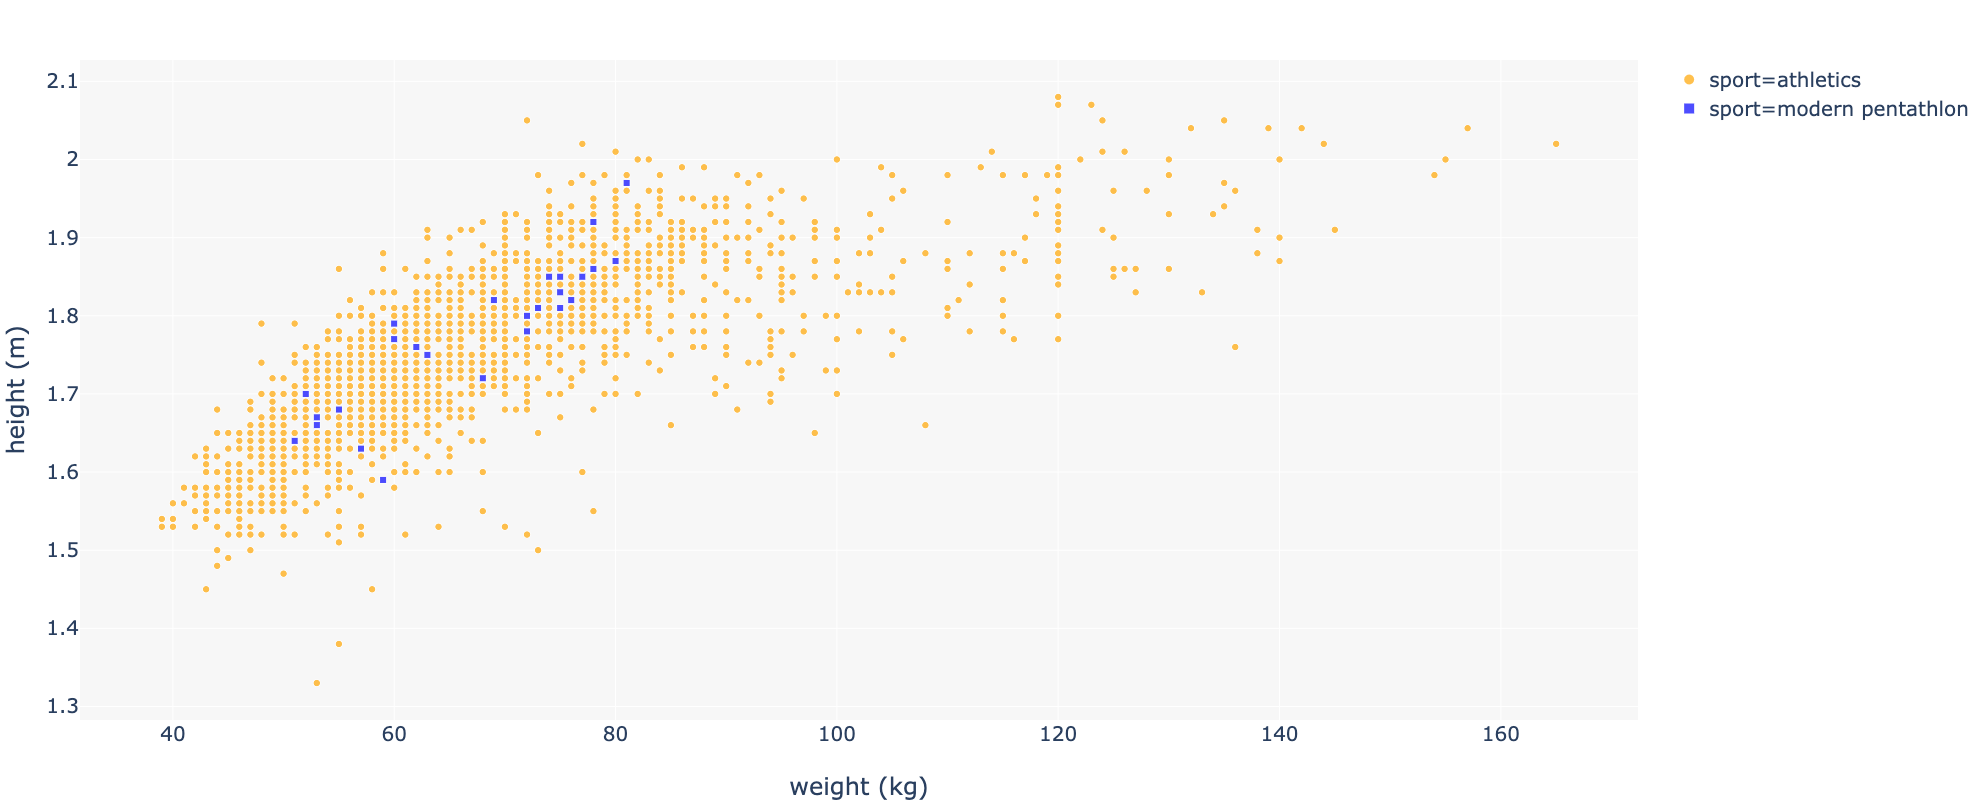

In [170]:
df_plot = df[ df['sport'].isin({'athletics','modern pentathlon'}) ] #,'weightlifting'}) ]
df_plot = df_plot.groupby(['height (m)','weight (kg)'])['sport'].first().reset_index()
df_plot['size'] = 5

print(df_plot['sport'].value_counts())

fig = px.scatter(df_plot,y='height (m)',x='weight (kg)',color='sport',size='size',size_max=5,symbol='sport',
                 color_discrete_map={'athletics':'orange','modern pentathlon':'blue'},
                symbol_map={'athletics':'circle','modern pentathlon':'square'})\
.update_layout(height=800,width=1000,font_size=20,plot_bgcolor='#f7f7f7')

fig.write_image("/Users/tim/Desktop/fig.png")
fig.show()

# Weightlifting vs Gymnastics

gymnastics       229
weightlifting    187
Name: sport, dtype: int64


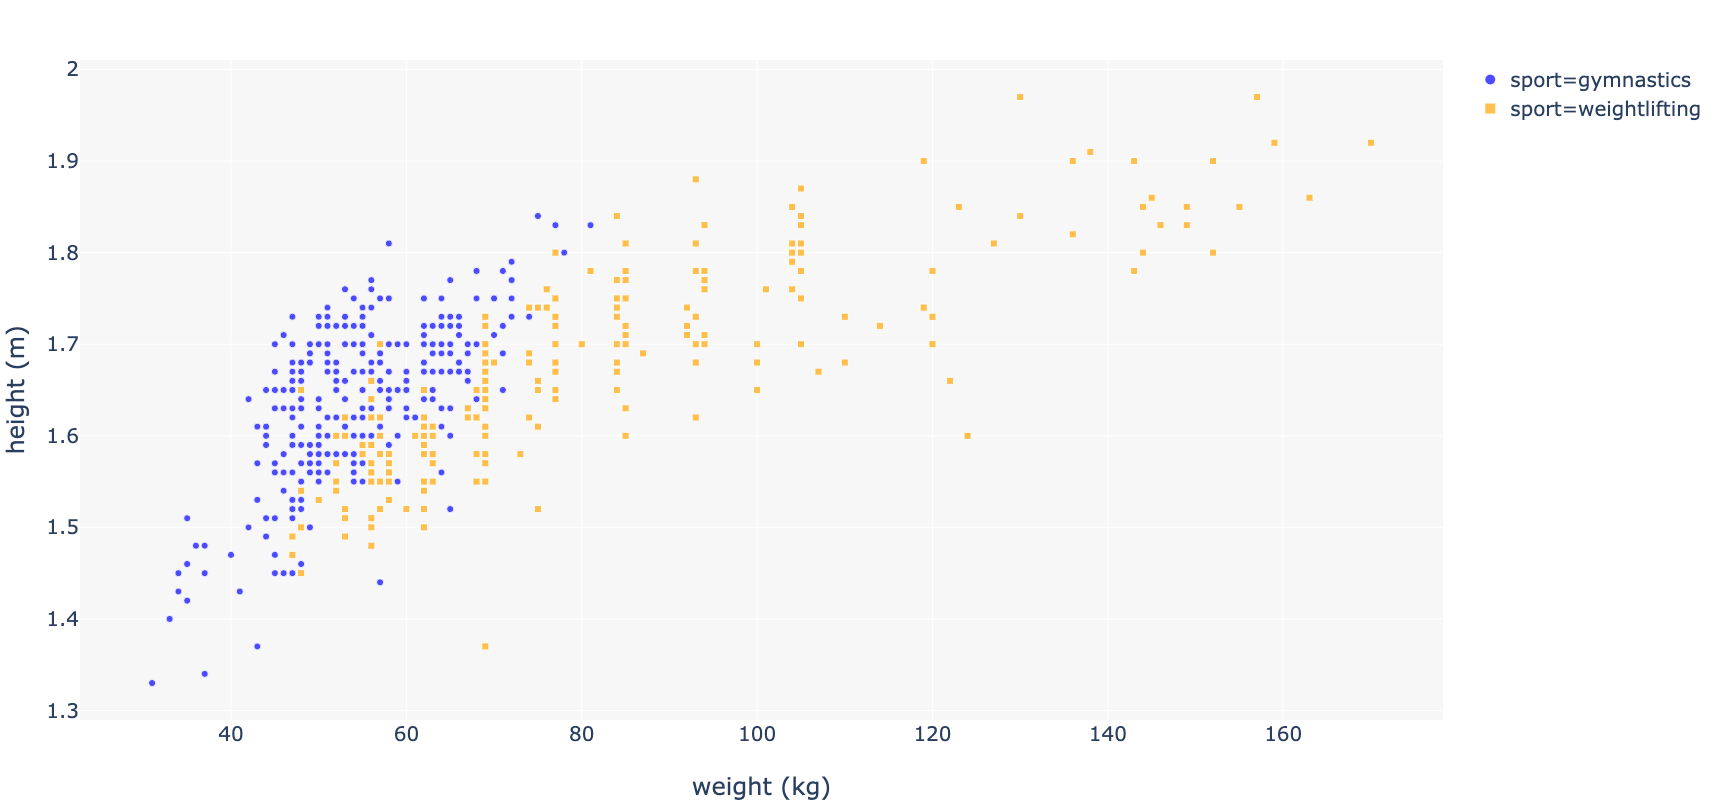

In [218]:
df_plot = df[ df['sport'].isin({'weightlifting','gymnastics'}) ] #,'weightlifting'}) ]
df_plot = df_plot.groupby(['height (m)','weight (kg)'])['sport'].first().reset_index()
df_plot['size'] = 5

print(df_plot['sport'].value_counts())

fig = px.scatter(df_plot,y='height (m)',x='weight (kg)',color='sport',size='size',size_max=5,symbol='sport',
                 color_discrete_map={'gymnastics':'blue','weightlifting':'orange'},
                 symbol_map={'gymnastics':'circle','weightlifting':'square'},)\
.update_layout(height=800,width=1000,font_size=20,plot_bgcolor='#f7f7f7')

fig.write_image("/Users/tim/Desktop/fig.png")
fig.show()

In [264]:
X = df_plot[['weight (kg)','height (m)']].values
Y = df_plot['sport'].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.7)

In [355]:
from sklearn.linear_model import LogisticRegression, HuberRegressor
mod = LogisticRegression(fit_intercept=True,solver='lbfgs')
#mod = HuberRegressor(epsilon=100)
mod.fit(X,Y)
print( np.mean( mod.predict(X) == Y ) )

0.8125


In [356]:
mod.coef_, mod.intercept_

(array([[ 0.13641279, -3.88526201]]), array([-2.48908863]))

In [349]:
f = lambda w:  np.ravel([  ( w*np.ravel(mod.coef_)[0] + np.ravel(mod.intercept_) )/(-np.ravel(mod.coef_)[1]) ])[0]
f(90)

2.519279943047537

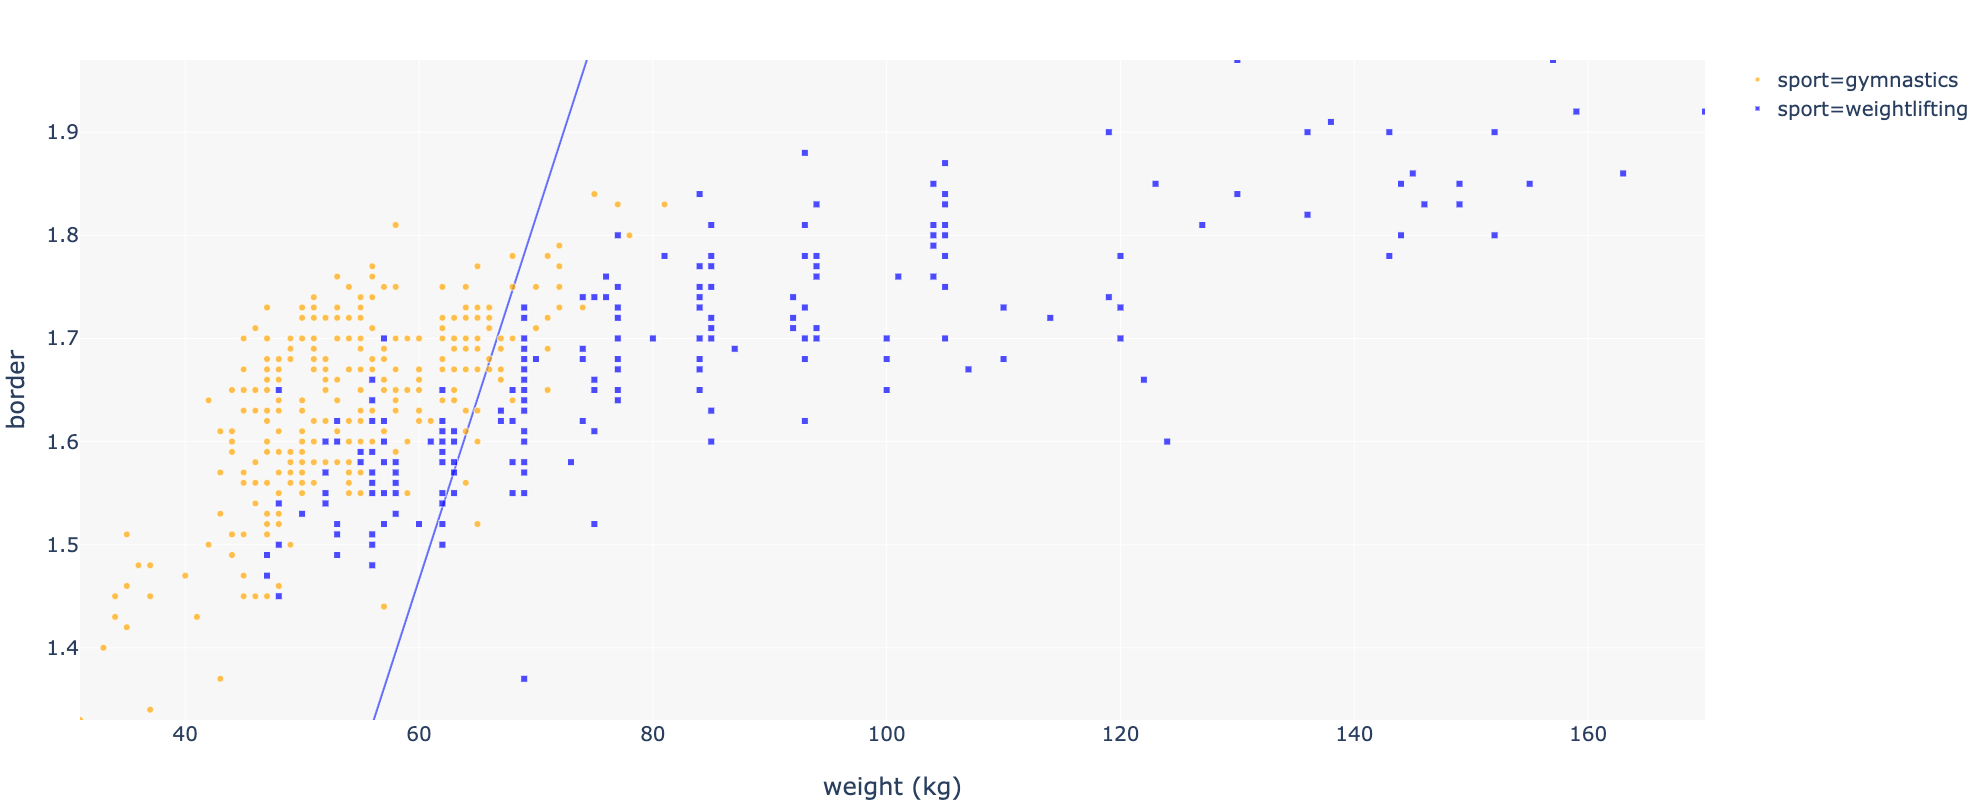

In [353]:
df_plot['border'] = df_plot['weight (kg)'].apply(f)
fig = px.line(df_plot,x='weight (kg)',y='border',range_x=(df_plot['weight (kg)'].min(),df_plot['weight (kg)'].max()),range_y=(df_plot['height (m)'].min(),df_plot['height (m)'].max()) )\
.update_layout(height=800,width=1000,font_size=20,plot_bgcolor='#f7f7f7')

fig2 = px.scatter(df_plot,y='height (m)',x='weight (kg)',color='sport',size='size',size_max=5,symbol='sport',
                 color_discrete_map={'gymnastics':'orange','weightlifting':'blue'},
                 symbol_map={'gymnastics':'circle','weightlifting':'square'},)

fig.add_trace(fig2.data[0])
fig.add_trace(fig2.data[1])

fig.write_image("/Users/tim/Desktop/fig.png")
fig.show()

In [352]:
from sklearn.metrics import classification_report
print(classification_report(mod.predict(X),Y))

               precision    recall  f1-score   support

   gymnastics       0.89      0.80      0.84       255
weightlifting       0.72      0.84      0.78       161

     accuracy                           0.81       416
    macro avg       0.80      0.82      0.81       416
 weighted avg       0.82      0.81      0.81       416



In [167]:
df_plot

height (m)  weight (kg) sport
0         1.0           50     a
1         1.5           75     b
2         2.0          100     a
3         2.0          100     a

# Train Neural Network

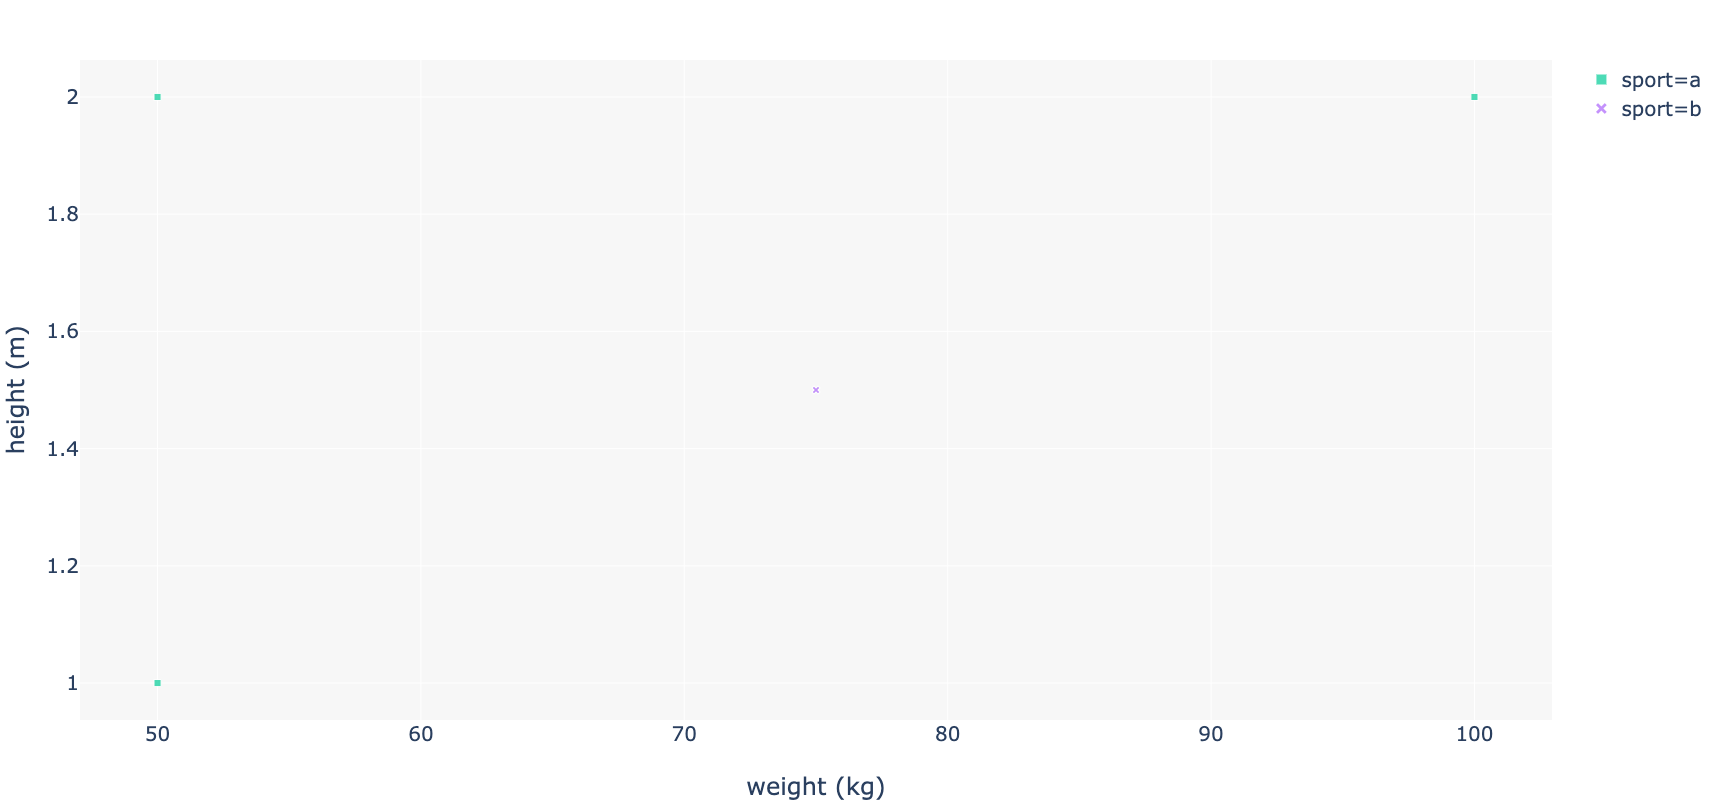

In [169]:
#df_plot = df[ df['sport'].isin({'weightlifting','gymnastics'}) ] #,'weightlifting'}) ]
#df_plot = df_plot.groupby(['height (m)','weight (kg)'])['sport'].first().reset_index()
df_plot = pd.DataFrame({'height (m)':[1,1.5,2,2],'weight (kg)':[50,75,50,100],'sport':['a','b','a','a']})
df_plot['size'] = 5

X = np.array(df_plot[['weight (kg)','height (m)']].values)
Y = np.array((df_plot['sport']=='gymnastics').astype(int).values)
#Y_ = ( df_plot['sport'] == 'gymnastics' ).astype(int)

##from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.7)

px.scatter(df_plot,y='height (m)',x='weight (kg)',color='sport',size='size',size_max=5,symbol='sport',
                 color_discrete_map={'gymnastics':'orange','weightlifting':'blue'},
                 symbol_map={'gymnastics':'circle','weightlifting':'square'},)\
.update_layout(height=800,width=1000,font_size=20,plot_bgcolor='#f7f7f7')

In [170]:
import jax.numpy as np
from jax import grad, jit, vmap


def sigmoid(x):
    #return 0.5 * (np.tanh(x / 2) + 1)
    return  ( 1/(1+np.exp(-x)) )*0.99998 + 0.00001

def relu(x):
    #return 0.5 * (np.tanh(x / 2) + 1)
    return  np.maximum(0.0,x)

def model(a,b):
    #return relu(sigmoid(X@a.T+b),1)
    return np.max(sigmoid(X@a.T+b),1) #multi-dimensional
    #return sigmoid( np.max(X_@a.T+b,1) ) #multi-dimensional
    #return sigmoid(np.sum(relu(X_@a.T+b),1)) #multi-dimensional
    #return sigmoid(np.sum(X_@a.T+b,1)) #multi-dimensional
    #return sigmoid(X_@a.T+b)

# def model(a,b):
#     p = sigmoid(np.dot(X_,a)+b)
#     return p

def loss(a,b):
    p = model(a,b)
    #label_probs = p*Y_ + (1-p)*Y_
    #return -np.mean(np.log(label_probs))
    return -np.mean( (1-Y)*np.log(1-p) + Y*np.log(p) )

#grad_fun = jit(grad(logreg))
#perex_grads = jit(vmap(grad_fun, in_axes=(None, 0, 0)))  # fast per-example grads
loss_grad = jit(grad(loss,argnums=(0,1)))

100%|██████████| 2000/2000 [00:08<00:00, 237.59it/s]

[[-0.21836394 -0.00760706]
 [-0.19642444  0.09527805]] [[-0.00473015 -0.00290539]]
1.0 1.0


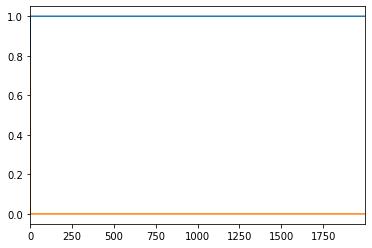

In [171]:
#a = np.array([0.1,0.1])
#b = -1.0

#a = np.array([0.0,0.0])
#b = 0.0

#a = np.array(mod.coef_[0])
#b = float(mod.intercept_[0])

a = np.array([[0.1,0.0],[0.0,0.1]])
b = np.array([[0.0,0.0]])

#a = np.array([[0.1,0.0],[0.0,0.1],[0.0,0.0]])
#b = np.array([[0.0,0.0,0.1]])

#a = np.array([[0.0,0.0]])
#b = np.array([[0.0]])

max_eps = 0.005
min_eps = 0.0001
epses = np.linspace(max_eps,min_eps,2000)

losses = list()
accuracies = list()

for eps in tqdm(epses):
    g = loss_grad(a,b)
    a = a - eps*g[0]
    b = b - eps*g[1]
    accuracies.append( float( np.mean( ( model(a,b) > 0.5 ) == Y )))
    losses.append(float(loss(a,b)))
print(a,b)
print(max(accuracies),accuracies[-1])
pd.Series(accuracies).plot()
pd.Series(losses).plot()

In [172]:
a

DeviceArray([[-0.21836394, -0.00760706],
             [-0.19642444,  0.09527805]], dtype=float32)

In [175]:
f0 = lambda w: ( w*a[0][0] + b[0][0] )/-a[0][1]
f1 = lambda w: ( w*a[1][0] + b[0][1] )/-a[1][1]
f0(1)

DeviceArray(-29.327246, dtype=float32)

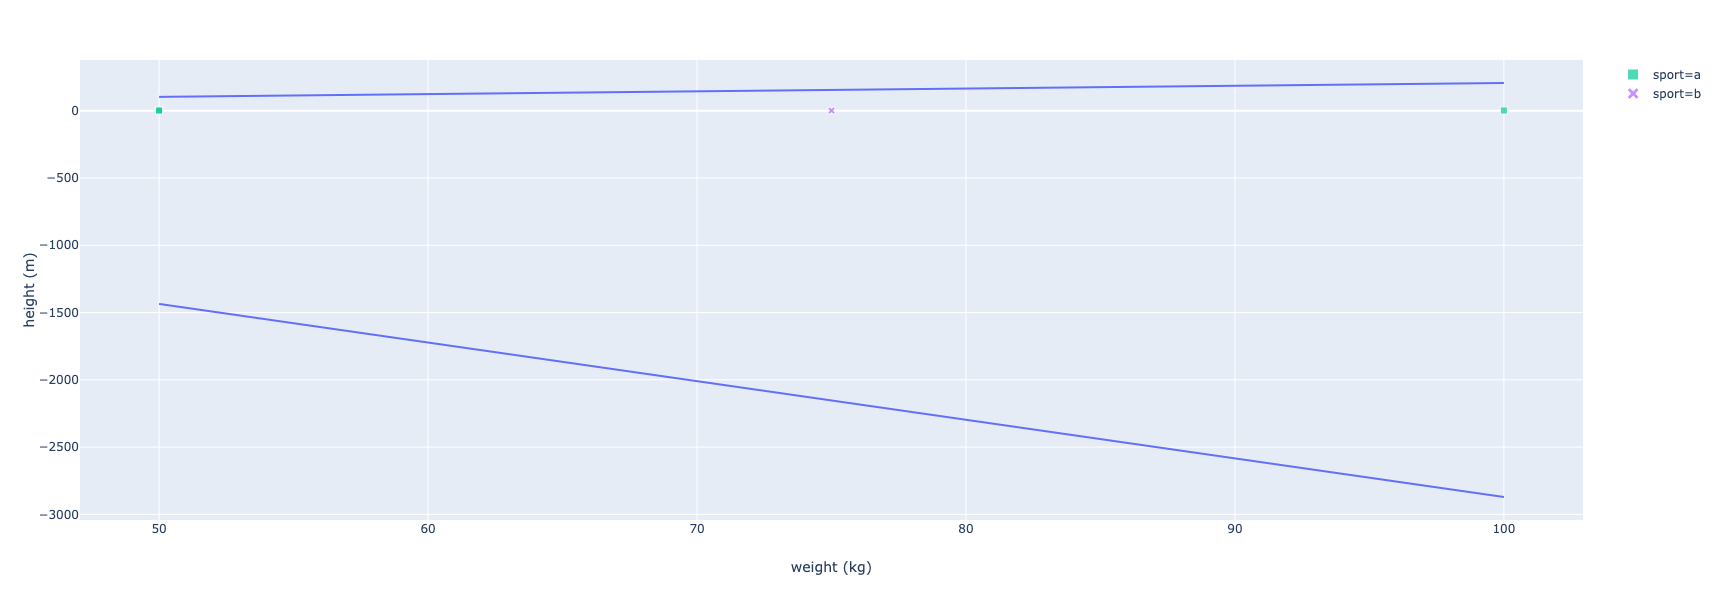

In [176]:
df_plot['border0'] = df_plot['weight (kg)'].apply(f0)
df_plot['border1'] = df_plot['weight (kg)'].apply(f1)

fig0 = px.line(df_plot,x='weight (kg)',y='border0',range_x=(df_plot['weight (kg)'].min(),df_plot['weight (kg)'].max()),range_y=(df_plot['height (m)'].min(),df_plot['height (m)'].max()) )\
.update_layout(height=800,width=1000,font_size=20,plot_bgcolor='#f7f7f7')

fig1 = px.line(df_plot,x='weight (kg)',y='border1',range_x=(df_plot['weight (kg)'].min(),df_plot['weight (kg)'].max()),range_y=(df_plot['height (m)'].min(),df_plot['height (m)'].max()) )\
.update_layout(height=800,width=1000,font_size=20,plot_bgcolor='#f7f7f7')

fig = px.scatter(df_plot,y='height (m)',x='weight (kg)',color='sport',size='size',size_max=5,symbol='sport',
                 color_discrete_map={'gymnastics':'orange','weightlifting':'blue'},
                 symbol_map={'gymnastics':'circle','weightlifting':'square'},)

fig.add_trace(fig0.data[0])
fig.add_trace(fig1.data[0])

fig.write_image("/Users/tim/Desktop/fig.png")
fig.show()

In [137]:
fig1.data[0]

Scatter({
    'hoverlabel': {'namelength': 0},
    'hovertemplate': 'weight (kg)=%{x}<br>border1=%{y}',
    'legendgroup': '',
    'line': {'color': '#636efa', 'dash': 'solid'},
    'mode': 'lines',
    'name': '',
    'showlegend': False,
    'x': array([ 31.,  37.,  43., ..., 170., 130., 157.]),
    'xaxis': 'x',
    'y': array([array(3.8197954, dtype=float32), array(4.668653, dtype=float32),
                array(5.5175114, dtype=float32), ..., array(23.485008, dtype=float32),
                array(17.825953, dtype=float32), array(21.645817, dtype=float32)],
               dtype=object),
    'yaxis': 'y'
})

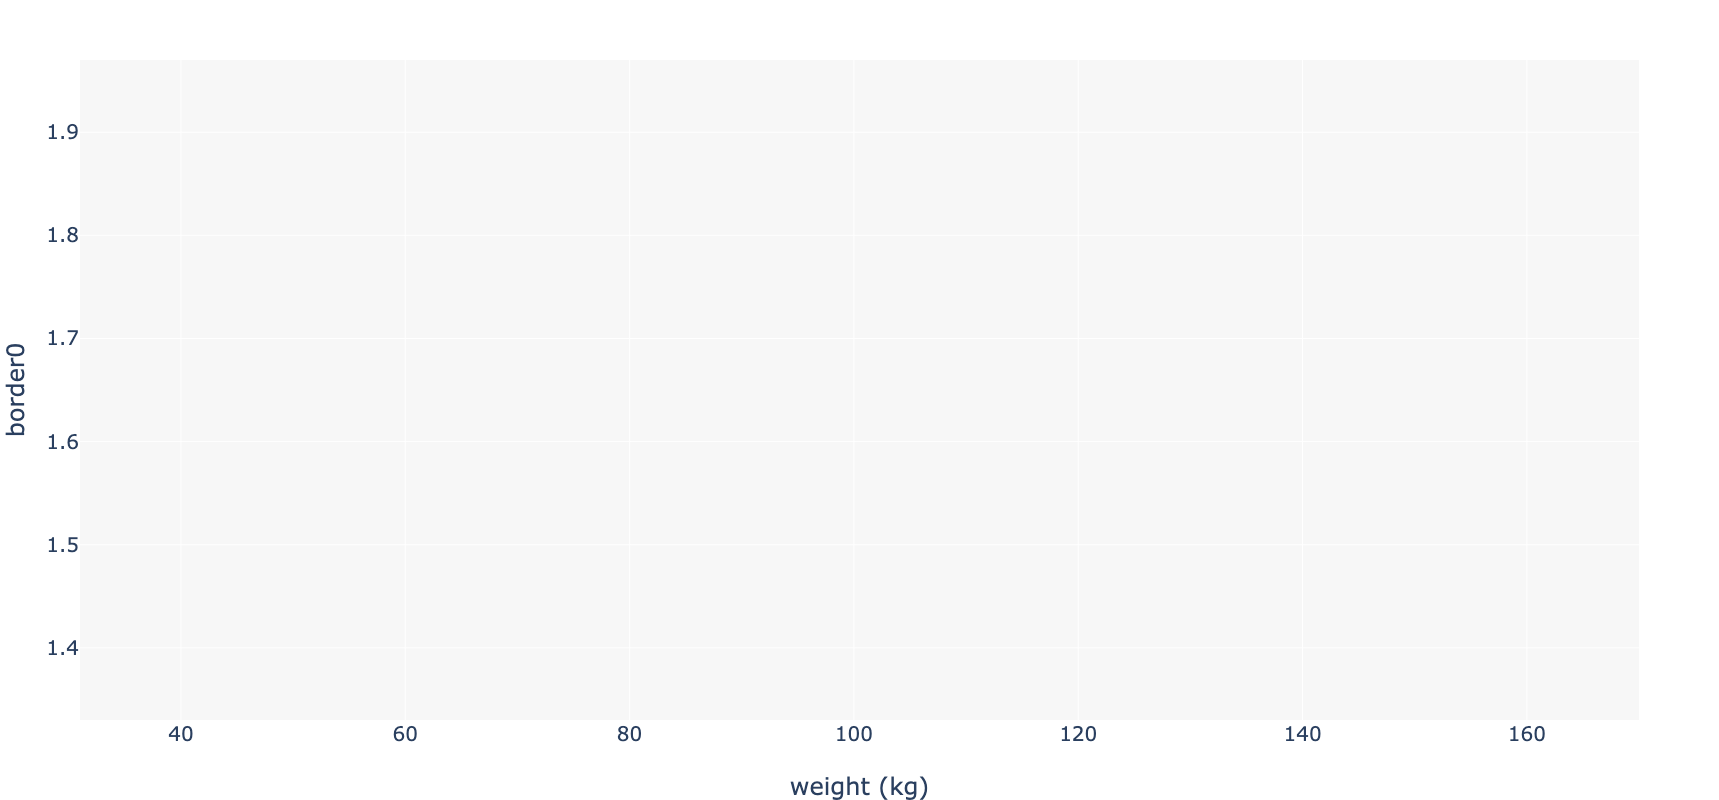

In [134]:
fig1 = px.line(df_plot,x='weight (kg)',y='border0',range_x=(df_plot['weight (kg)'].min(),df_plot['weight (kg)'].max()),range_y=(df_plot['height (m)'].min(),df_plot['height (m)'].max()) )\
.update_layout(height=800,width=1000,font_size=20,plot_bgcolor='#f7f7f7')
fig1

/opt/anaconda3/lib/python3.7/site-packages/jax/lax/lax.py:4435: UserWarning:

Explicitly requested dtype <class 'int'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.



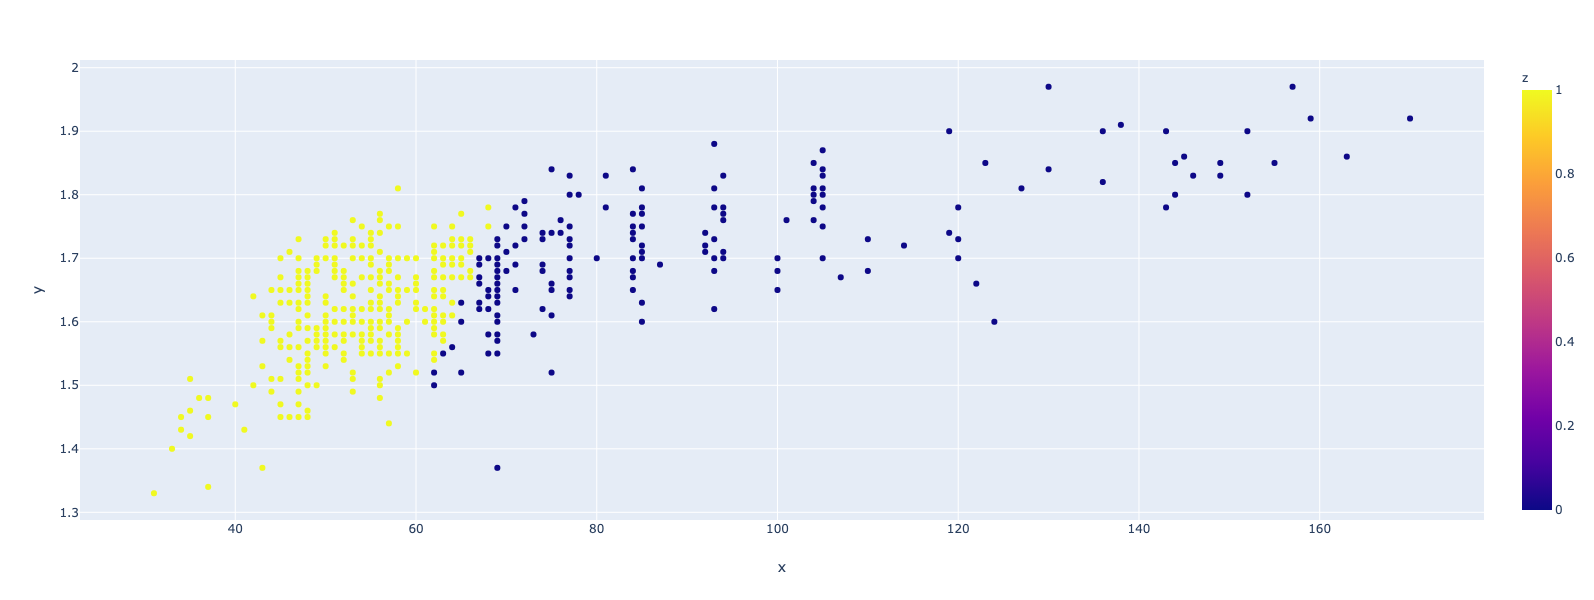

In [80]:
px.scatter(pd.DataFrame({'x':X[:,0],'y':X[:,1],'z':( model(a,b) > 0.5 ).astype(int)}),x='x',y='y',color='z',height=600,width=600)